We begin by setting up our working environment by importing the necessary Python libraries that we will use throughout the notebook

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
import os
import sys

In [10]:
notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
data_dir = os.path.join(project_dir, 'data')

### Importing the data

In [13]:
df = pd.read_csv(os.path.join(data_dir, 'clean_field_data.csv'))
df.head(10)

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield,Weather_station
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964,4
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302,0
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647,0
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348,1
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076,1
5,5304,850.56647,-2.050665,-7.132769,Rural_Kilimani,50.451250,649.4,-3.0,29.5,13.25,0.70,Sandy,5.484350,1.275280e-01,1.7,1.112611,potato,0.654477,1
6,429,331.35538,-13.409517,-6.722849,Rural_Hawassa,5.907423,1586.0,-6.8,31.8,12.50,0.63,Silt,7.061317,4.315457e-07,2.9,0.994325,banana,0.342871,2
7,672,790.73846,-3.785356,-1.470468,Rural_Kilimani,15.380596,1188.3,-3.0,31.0,14.00,0.63,Sandy,4.577043,6.131074e-01,1.4,0.558899,tea,0.399214,3
8,26124,742.72180,-10.237509,-0.736216,Rural_Sokoto,3.431843,2143.3,-2.6,28.2,12.80,0.66,Volcanic,5.447321,2.784792e-01,13.9,8.532665,coffee,0.613861,0
9,44050,747.38030,-3.767334,-3.105643,Rural_Kilimani,8.239554,796.6,-3.8,32.7,14.45,0.58,Sandy,4.897414,3.103862e-01,4.6,2.214679,cassava,0.481452,3


Let start by analysing the effect of numerical columns on the standard yield. But before that we don't have any column with null value.

'Location', 'Crop_type', and 'Soil_type' columns are not numberic. For now let's hold on the numeric only columns. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           5654 non-null   int64  
 1   Elevation          5654 non-null   float64
 2   Latitude           5654 non-null   float64
 3   Longitude          5654 non-null   float64
 4   Location           5654 non-null   object 
 5   Slope              5654 non-null   float64
 6   Rainfall           5654 non-null   float64
 7   Min_temperature_C  5654 non-null   float64
 8   Max_temperature_C  5654 non-null   float64
 9   Ave_temps          5654 non-null   float64
 10  Soil_fertility     5654 non-null   float64
 11  Soil_type          5654 non-null   object 
 12  pH                 5654 non-null   float64
 13  Pollution_level    5654 non-null   float64
 14  Plot_size          5654 non-null   float64
 15  Annual_yield       5654 non-null   float64
 16  Crop_type          5654 

## Univariant Analysis 
let's observe the distribution each numeric only columns to see the skewness of predictors. 

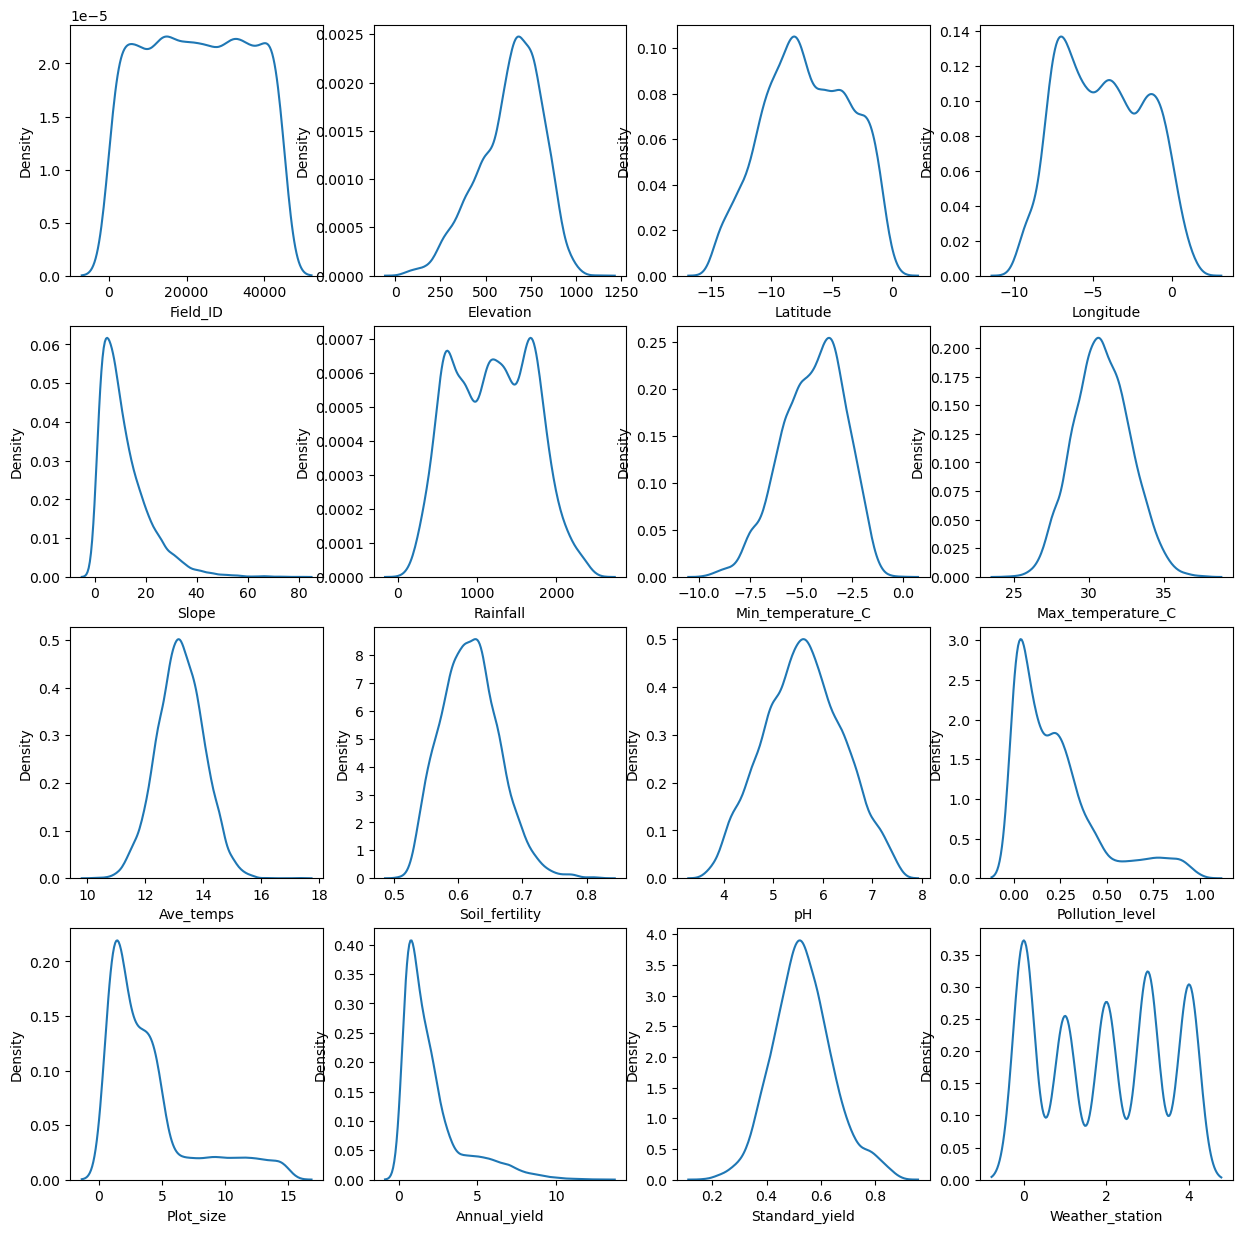

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))  # Adjust the figure size as needed
axes = axes.flatten()
for i, column in enumerate(df.select_dtypes(include = 'number').columns):
    sns.kdeplot(data=df, x=column, ax=axes[i])
plt.show()

**Notes:**
- The distribution of the `Slope` variable is skewed a bit to the left, which means the mean value may not be the best measure of central tendency. Most values are below the mean, but there are some extreme values influencing the mean calculation. We should be careful when we use this column in statistical calculations. 

- The KDE of `Rainfall` appears normal but seems to have multiple peaks. This may indicate underlying patterns that are overlapping. We should take a closer look. 

- The distribution of `standard yield` follows nearly uniform distribution which means that, The vairable we are looking for to predict have optimal yield aroud the mean.
